# Natural Language Processing (NLP)

**dataset: sms spam collection**

Natural Language Processing basically consists of combining machine learning techniques with text, and using math and statistics to get that text in a format that the machine learning algorithms can understand.

Requirements: NLTK library must be installed, along with downloading the corpus for stopwords. To download everything with a conda installation, run the cell below:

**ONLY RUN THIS CELL IF IT IS NEEDED**

1) *!conda install nltk* --> This installs nltk

2) *import nltk* --> Imports the library

3) *nltk.download()* --> Download the necessary datasets

## Getting the data

There will be use of the dataset from the [UCI datasets](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection)! 

**This dataset is already located at the relevant folder: 'smsspamcollection/SMSSpamCollection' (I'll use that way)**

The filecontains a collection of more than 5 thousand SMS phone messages. Checking out the **readme** file for more info is a good idea.

#### Importing nltk library and downloading and installing the *stopwords* package:

In [1]:
import nltk

In [2]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> l

Packages:
  [*] abc................. Australian Broadcasting Commission 2006
  [*] alpino.............. Alpino Dutch Treebank
  [*] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [*] basque_grammars..... Grammars for Basque
  [*] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [*] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [*] book_grammars....... Grammars from NLTK Book
  [*] brown............... Brown Corpus
  [*] brown_tei........... Brown Corpus (TEI XML Version)
  [*] cess_cat............ CESS-CAT Treebank
  [*] cess_esp............ CESS-ESP Treebank
  [*] chat80.....

nltk.download_shell() package management commands:

- list: l
- download: d
- update: u
- config: c
- help: h
- quit: q

#### Using *rstrip()* plus a list comprehension to get a list of all the lines of text messages:

In [3]:
# list of messages
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [4]:
# printing the length of messages:
print("length of messages:",len(messages))

length of messages: 5574


In [5]:
# printing the first SMS message:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

#### A collection of texts is also sometimes called "corpus". 

**Printing below the first ten messages and number them using *enumerate*:**

In [6]:
for mess_no, message in enumerate(messages[:10]):
    print(mess_no, message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

Due to the spacing, this is a TSV ("tab separated values") file, where the first column is a label saying whether the given message is a normal message (commonly known as "ham") or "spam". The second column is the message itself.

*Note: that the numbers aren't part of the file, they are just from the **enumerate** call*

Using these labeled ham and spam examples, **a machine learning model will be trained to learn to discriminate between ham/spam automatically**. Then, with a trained model, there will be the **ability to classifying arbitrary unlabeled messages as ham or spam**.

#### for example, the first message shows clearly the '\t' character, which functions as a 'TAB' separation character:

In [7]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

#### Instead of parsing TSV manually using Python, there will be use of the advantage of Pandas library:

In [8]:
import pandas as pd

#### Loading dataset:

Using the Pandas *read_csv* and making note of the sep argument. The desired column names are also specified by passing in a list of names.

In [9]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t', names=['label', 'message'])

In [10]:
# printing the head of the dataset
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Now it's better for processing!

## Exploratory Data Analysis

#### Here are some of the stats with some plots and the built-in methods in Pandas (*describe()* and *info()*):

In [11]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [12]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
label      5572 non-null object
message    5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


#### Using **groupby** to use describe by label. In this way, there is a beggining to think about the features that separate ham and spam:

In [13]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

Continuing the analysis I want to start thinking about the features I am going to be using. This goes along with the general idea of [feature engineering](https://en.wikipedia.org/wiki/Feature_engineering). The better the domain knowledge on the data I have, the better the ability to engineer more features from it. Feature engineering is a very large part of spam detection in general.

#### Making a new column to detect how long the text messages are:

In [14]:
messages['length'] = messages['message'].apply(len)

In [15]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


### Data Visualization

In [16]:
# importing the visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### Making a histogram with the messages' lengths:

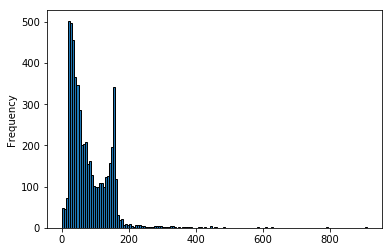

In [17]:
messages['length'].plot(kind='hist', bins=150, edgecolor="k")

**Playing around with the bin size, it looks like text length may be a good feature to think about!**

**Trying to explain next why the x-axis goes all the way to 1000ish. This must mean that there is some really long message, using *describe()* to the 'length' column:**

In [18]:
messages.length.describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

#### 910 characters is the maximum message! I 'll be using Pandas masking to find this message:

In [19]:
messages[messages['length'] == 910]

,label,message,length
1085,ham,For me the love should start with attraction.i...,910


#### Printing that message:

In [20]:
messages[messages['length'] == 910]['message'].iloc[0]  # printing the entire string 

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

It looks like a love letter!
 
#### Trying more to see if message length is a distinguishing feature between ham and spam:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x118b2dc18>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1a1c918668>], dtype=object)

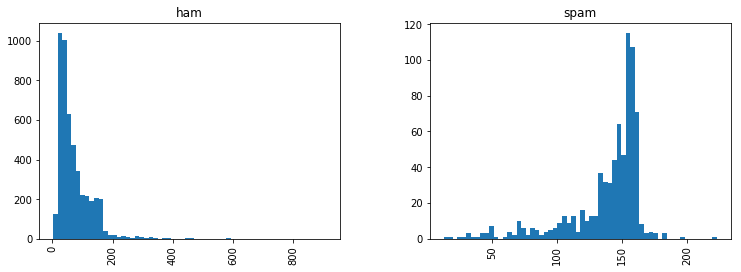

In [21]:
messages.hist(column='length', bins=60, by='label', figsize=(12,4))

**Very interesting! Through just basic Exploratory Data Analysis someone can discover that thre is a trend that spam messages tend to have more characters!**

## Text Preprocessing

The main issue with the data is that it is all in text format (strings). The classification algorithms will need some sort of numerical feature vector in order to perform the classification task. There are actually many methods to convert a corpus to a vector format. The simplest is the the [bag-of-words](http://en.wikipedia.org/wiki/Bag-of-words_model) approach, where each unique word in a text will be represented by one number.


Here, the raw messages (sequence of characters) will be converted into vectors (sequences of numbers).

As a first step, a function is written that will split a message into its individual words and return a list. Also, the very common words will be removed, ('the', 'a', etc..). To do this, the NLTK library's advantage is exploited. It's pretty much the standard library in Python for processing text and has a lot of useful features. There will be used only some of the basic ones here.

A function is created that will process the string in the message column. Then, the Pandas **apply()** method is used do process all the text in the DataFrame.

### Processes

#### 1) removing punctuation, by taking advantage of Python's built-in **string** library to get a quick list of all the possible punctuation:

In [22]:
import string

In [23]:
# an example with a raw text message
mess = 'Sample message! Notice: it has punctuation.'

In [24]:
# checking string.punctuation
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [25]:
# Checking the characters to see if they are in punctuation
nopunc = [char for char in mess if char not in string.punctuation]

In [26]:
nopunc

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [27]:
# Joining the characters again to form the string.
nopunc = ''.join(nopunc)

In [28]:
nopunc

'Sample message Notice it has punctuation'

#### 2) removing stopwords, by importing a list of english stopwords from NLTK (check NLTK's documentation for more languages and info):

In [29]:
from nltk.corpus import stopwords

In [30]:
# showing the first 10 english stop words of that list
stopwords.words('english')[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [31]:
# splitting the nopunc string
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [32]:
# removing the stopwords using list comprehension
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [33]:
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

#### 4) putting both of these together in a function to apply it to our DataFrame later on:

In [34]:
def text_process(message):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Checking characters to see if they are in punctuation
    nopuncuation = [char for char in message if char not in string.punctuation]

    # Joining the characters again to form the string.
    nopuncuation = ''.join(nopuncuation)
    
    # Removing any stopwords
    return [word for word in nopuncuation.split() if word.lower() not in stopwords.words('english')]

#### 5) checking messages dataframe again:

In [35]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


Now, the next step is to "tokenize" these messages. Tokenization is just the term used to describe the process of converting the normal text strings in to a list of tokens (words that I actually want).

Seeing below an example output on one column:

Note: Someone may get some warnings or errors for symbols that were not taken into account for or that weren't in Unicode (like a British pound symbol)

#### 6) checking that the function really works in the first 5 rows:

In [36]:
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

### Continuing Normalization

There are a lot of ways to continue normalizing this text. Such as [Stemming](https://en.wikipedia.org/wiki/Stemming) or distinguishing by [part of speech](http://www.nltk.org/book/ch05.html).

Stemming:

run, ran, running --> run

NLTK has lots of built-in tools and great documentation on a lot of these methods. Sometimes they don't work well for text-messages due to the way a lot of people tend to use abbreviations or shorthand, For example:
    
    'Nah dawg, IDK! Wut time u headin to da club?'
    
versus

    'No dog, I don't know! What time are you heading to the club?'
    
Some text normalization methods will have trouble with this type of shorthand (u --> you, dun --> done, etc.) and so a good idea is to explore those more advanced methods through the [NLTK book online](http://www.nltk.org/book/).

Here, the point is to focus on using what I have to convert the list of words to an actual vector that SciKit-Learn can use.

### Vectorization

Currently, the messages are lists of tokens (also known as [lemmas](http://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html)) and now I need to convert each of those messages into a vector the SciKit Learn's algorithm models can work with.

The next part is to convert each message, represented as a list of tokens (lemmas) above, into a vector that Machine Learning models can understand.

This procedure includes three steps using the bag-of-words model:

1. Count how many times does a word occur in each message (Known as term frequency)

2. Weigh the counts, so that frequent tokens get lower weight (inverse document frequency)

3. Normalize the vectors to unit length, to abstract from the original text length (L2 norm)

Beginning the first step.

Each vector will have as many dimensions as there are unique words in the SMS corpus.  I will first use SciKit Learn's **CountVectorizer**. This model will convert a collection of text documents to a matrix of token counts. (**this is the Bag of Words model**)

This as a 2-Dimensional matrix. Where the 1-dimension is the entire vocabulary (1 row per word) and the other dimension are the actual documents, in this case a column per text message. 

For example:

<table border = “1“>
<tr>
<th></th> <th>Message 1</th> <th>Message 2</th> <th>...</th> <th>Message N</th> 
</tr>
<tr>
<td><b>Word 1 Count</b></td><td>0</td><td>1</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>Word 2 Count</b></td><td>0</td><td>0</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>...</b></td> <td>1</td><td>2</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>Word N Count</b></td> <td>0</td><td>1</td><td>...</td><td>1</td>
</tr>
</table>


Since there are so many messages, I can expect a lot of zero counts for the presence of that word in that document. Because of this, SciKit Learn will output a [Sparse Matrix](https://en.wikipedia.org/wiki/Sparse_matrix).

In [37]:
from sklearn.feature_extraction.text import CountVectorizer

There are a lot of arguments and parameters that can be passed to the CountVectorizer. In this case I will just specify the analyzer to be the previously defined function I made (the *text_process()* function):

In [38]:
bag_of_words_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

The above made a very large matrix!

##### Printing total number of vocabulary words:

In [39]:
print(len(bag_of_words_transformer.vocabulary_))

11425


#### Taking one text message and getting its bag-of-words counts as a vector, putting to use the new *bag_of_words_transformer*:

In [40]:
message_example = messages['message'][3]

In [41]:
print(message_example)

U dun say so early hor... U c already then say...


**seeing its vector representation:**

In [42]:
bag_of_words_example = bag_of_words_transformer.transform([message_example])

In [43]:
print(bag_of_words_example)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [44]:
print(bag_of_words_example.shape)

(1, 11425)


#### This means that there are seven unique words in message number 4 (after removing common stop words). Two of them appear twice, the rest only once.

#### Checking and confirming which ones appear twice:

In [45]:
# I parse the index that is printed to the 'bag_of_words_example' object
print(bag_of_words_transformer.get_feature_names()[4068])
print(bag_of_words_transformer.get_feature_names()[9554])

U
say


Now I can use the **.transform** on the Bag-of-Words (bag_of_words_transformer) transformed object and transform the entire DataFrame of messages.

#### Checking out how the bag-of-words counts for the entire SMS corpus is a large, sparse matrix:

In [46]:
messages_bag_of_words = bag_of_words_transformer.transform(messages['message'])

In [47]:
print('Shape of Sparse Matrix: ', messages_bag_of_words.shape)
print('Amount of Non-Zero occurences: ', messages_bag_of_words.nnz)

Shape of Sparse Matrix:  (5572, 11425)
Amount of Non-Zero occurences:  50548


#### Measuring the Sparsity:

In [48]:
# (100 * non zero messages) / (rows * columns) --> i.e. the overall number of messages or else I can say, the shape
sparsity = (100.0 * messages_bag_of_words.nnz / (messages_bag_of_words.shape[0] * messages_bag_of_words.shape[1]))
print('sparsity: {}'.format(sparsity))

sparsity: 0.07940295412668218


**Sparsity** compares the number of non-zeros messages versus the actual total number of messages. And this kind of metric gives an idea of just how many zeros there are in the actual matrix.

#### After the counting, the term weighting and normalization can be done with [TF-IDF](http://en.wikipedia.org/wiki/Tf%E2%80%93idf), using scikit-learn's `TfidfTransformer`.

____
### TF-IDF theory explanation
TF-IDF stands for *term frequency-inverse document frequency*, and the tf-idf weight is a weight often used in information retrieval and text mining. This weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus. Variations of the tf-idf weighting scheme are often used by search engines as a central tool in scoring and ranking a document's relevance given a user query.

One of the simplest ranking functions is computed by summing the tf-idf for each query term; many more sophisticated ranking functions are variants of this simple model.

Typically, the tf-idf weight is composed by two terms: the first computes the normalized Term Frequency (TF), aka. the number of times a word appears in a document, divided by the total number of words in that document; the second term is the Inverse Document Frequency (IDF), computed as the logarithm of the number of the documents in the corpus divided by the number of documents where the specific term appears.

**TF: Term Frequency**, which measures how frequently a term occurs in a document. Since every document is different in length, it is possible that a term would appear much more times in long documents than shorter ones. Thus, the term frequency is often divided by the document length (aka. the total number of terms in the document) as a way of normalization: 

*TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).*

**IDF: Inverse Document Frequency**, which measures how important a term is. While computing TF, all terms are considered equally important. However it is known that certain terms, such as "is", "of", and "that", may appear a lot of times but have little importance. Thus we need to weigh down the frequent terms while scale up the rare ones, by computing the following: 

*IDF(t) = log_e(Total number of documents / Number of documents with term t in it).*

See below for a simple example.

**Example:**

Consider a document containing 100 words wherein the word 'cat' appears 3 times. 

The term frequency (i.e., tf) for cat is then (3 / 100) = 0.03. Now, assume we have 10 million documents and the word cat appears in one thousand of these. Then, the inverse document frequency (i.e., idf) is calculated as log(10,000,000 / 1,000) = 4. Thus, the Tf-idf weight is the product of these quantities: 0.03 * 4 = 0.12.
____

Seeing now how this can be done in SciKit Learn:

In [49]:
from sklearn.feature_extraction.text import TfidfTransformer

#### Making an instance of the TfidfTransformer for the entire messages corpus:

In [50]:
tfidf_transformer = TfidfTransformer().fit(messages_bag_of_words)

Checking the TfidfTransformer instance that is made above to the message example that was tested earlier:

In [53]:
# printing the message example

In [54]:
message_example

'U dun say so early hor... U c already then say...'

In [55]:
tfidf_example = tfidf_transformer.transform(bag_of_words_example)

In [56]:
print(tfidf_example)

  (0, 9554)	0.538562626293
  (0, 7186)	0.438936565338
  (0, 6222)	0.318721689295
  (0, 6204)	0.299537997237
  (0, 5261)	0.297299574059
  (0, 4629)	0.266198019061
  (0, 4068)	0.408325899334


These numbers are interpreted as a weight value for each of these words versus the actual document.

#### Checking what is the IDF (inverse document frequency) of the particular words "u" and of word "university":

In [57]:
print(tfidf_transformer.idf_[bag_of_words_transformer.vocabulary_['university']])

8.5270764989


In [58]:
print(tfidf_transformer.idf_[bag_of_words_transformer.vocabulary_['u']])

3.28005242674


#### Transforming the entire bag-of-words corpus into TF-IDF corpus at once:

In [59]:
messages_tfidf = tfidf_transformer.transform(messages_bag_of_words)

Printing the shape:

In [60]:
print(messages_tfidf.shape)

(5572, 11425)


There are many ways the data can be preprocessed and vectorized. These steps involve feature engineering and building a "pipeline". Checking out SciKit Learn's documentation is a good idea on dealing with text data as well as the expansive collection of available papers and books on the general topic of NLP.

## Training a Machine Learning model

With messages represented as numerical vectors, I can finally train our spam/ham classifier. Now I can actually use almost any sort of classification algorithms. **For a [variety of reasons](http://www.inf.ed.ac.uk/teaching/courses/inf2b/learnnotes/inf2b-learn-note07-2up.pdf), the Naive Bayes classifier algorithm is a good choice, and it is usually used in text data ML models.**

#### I 'll be using Scikit-learn, choosing the [Naive Bayes](http://en.wikipedia.org/wiki/Naive_Bayes_classifier) classifier to start with:

In [61]:
from sklearn.naive_bayes import MultinomialNB

Instantiating the ML model:

In [62]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


#### Training the model:

In [63]:
spam_detection_model = MultinomialNB().fit(messages_tfidf, messages.label)

or: *spam_detection_model = MultinomialNB().fit(messages_tfidf, messages['label'])*

#### Making predictions by classifying the single random example message that was selected above:

In [64]:
spam_detection_model.predict(tfidf_example)

array(['ham'],
      dtype='<U4')

Printing the first item of that output array:

In [65]:
spam_detection_model.predict(tfidf_example)[0]

'ham'

Chekcing the original message:

In [66]:
messages['label'][3]

'ham'

In [67]:
messages['message'][3]

'U dun say so early hor... U c already then say...'

Thus, a model that can attempt to predict spam vs ham classification has been developed!

## Model Evaluation without Train/Test Split

**Now I want to determine how well the model will do overall on the entire dataset.**

#### Getting all the predictions:

In [68]:
all_predictions = spam_detection_model.predict(messages_tfidf)

In [69]:
print(all_predictions)

['ham' 'ham' 'spam' ..., 'ham' 'ham' 'ham']


Evaluating the model can be done by using SciKit Learn's built-in classification report, which returns [precision, recall,](https://en.wikipedia.org/wiki/Precision_and_recall) [f1-score](https://en.wikipedia.org/wiki/F1_score), and a column for support (meaning how many cases supported that classification).

Here are some figures for more depicted info on each of these metrics:

<img src='Precisionrecall.svg.png' width=400 />

#### Evaluating the model:

In [70]:
from sklearn.metrics import classification_report

In [72]:
print(classification_report(messages['label'], all_predictions))

             precision    recall  f1-score   support

        ham       0.98      1.00      0.99      4825
       spam       1.00      0.85      0.92       747

avg / total       0.98      0.98      0.98      5572



## Model Evaluation with Train/Test Split

There are quite a few possible metrics for evaluating model performance. Which one is the most important depends on the task and the business effects of decisions based off of the model. For example, the cost of mis-predicting "spam" as "ham" is probably much lower than mis-predicting "ham" as "spam".

In the above "evaluation",I evaluated accuracy on the same data I used for training. **Someone should never actually evaluate on the same dataset she trains on!**

Such evaluation tells nothing about the true predictive power of our model. If I simply remembered each example during training, the accuracy on training data would trivially be 100%, even though I wouldn't be able to classify any new messages.

A proper way is to splitting the data into a training/test set, where the model only ever sees the **training data** during its model fitting and parameter tuning. The **test data** is never used in any way. This is then the final evaluation on test data which is representative of true predictive performance.

In [73]:
from sklearn.model_selection import train_test_split

#### Splitting the data:

In [74]:
message_train, message_test, label_train, label_test = train_test_split(messages.message, messages.label, test_size=0.2)

or: *message_train, message_test, label_train, label_test = train_test_split(messages['message'], messages['label'], test_size=0.2)*

In [75]:
print(len(message_train), len(message_test), len(message_train) + len(message_test))

4457 1115 5572


In [76]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
label      5572 non-null object
message    5572 non-null object
length     5572 non-null int64
dtypes: int64(1), object(2)
memory usage: 130.7+ KB


The test size is 20% of the entire dataset (1115 messages out of total 5572), and the training is the rest (4457 out of 5572). *Note that the default split would have been 30/70*.

## Creating a Data Pipeline

Let's run the ML model again and then predict off the test set. There will be use of SciKit Learn's [pipeline](http://scikit-learn.org/stable/modules/pipeline.html) capabilities to storing a pipeline of workflow. This will allow someone to set up all the transformations that she will do to the data for future use.

In [77]:
from sklearn.pipeline import Pipeline

*Essentially I summarize all the steps I just did before into a pipeline. So I don't have to constantly repeat everything for different sets of data.*

#### Instantiating the pipeline object

In [78]:
from sklearn.pipeline import Pipeline

Pipeline takes just the *'steps'* argument (i.e. passing in a list of what there has to be done):

In [81]:
pipeline = Pipeline([
    ('bag_of_words', CountVectorizer(analyzer=text_process)),  # 1) strings to token integer counts
    ('tfidf_scores', TfidfTransformer()),  # 2) integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB())  # 3) train on TF-IDF vectors w/ Naive Bayes classifier
])

#### Now I can directly pass message text data and the pipeline will do all the pre-processing!

#### It can be treated as a model/estimator API, and then training the Naibe Bayes ML model:

In [82]:
# training the model
pipeline.fit(message_train, label_train)

Pipeline(memory=None,
     steps=[('bag_of_words', CountVectorizer(analyzer=<function text_process at 0x1a1fddd510>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preproce...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

#### Making predictions:

In [84]:
predictions = pipeline.predict(message_test)

#### Classification reports:

In [85]:
from sklearn.metrics import classification_report, confusion_matrix

In [86]:
print('Classification report:')
print(classification_report(label_test, predictions))

Classification report:
             precision    recall  f1-score   support

        ham       0.96      1.00      0.98       974
       spam       1.00      0.72      0.84       141

avg / total       0.97      0.97      0.96      1115



In [87]:
print('Confusion matrix:')
print(confusion_matrix(label_test, predictions))

Confusion matrix:
[[974   0]
 [ 39 102]]


Now I have a classification report for the ML model on a true testing set! There is a lot more to Natural Language Processing than what I've covered here, and it can has a vast expanse as a topic of Machine Learning. It is actually a huge sub-field of Machine Learning.

## Other Resources

The links below contain more info on Natural Language Processing field:

[NLTK Book Online](http://www.nltk.org/book/)

[Kaggle Walkthrough](https://www.kaggle.com/c/word2vec-nlp-tutorial/details/part-1-for-beginners-bag-of-words)

[SciKit Learn's Tutorial](http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html)

### Training a different Machine Learning Model --> Random Forest

In [88]:
from sklearn.ensemble import RandomForestClassifier

In [89]:
pipeline2 = Pipeline([
    ('bag_of_words', CountVectorizer(analyzer=text_process)),  # 1) strings to token integer counts
    ('tfidf_scores', TfidfTransformer()),  # 2) integer counts to weighted TF-IDF scores
    ('classifier', RandomForestClassifier())  # 3) train on TF-IDF vectors w/ Naive Bayes classifier
])

In [90]:
# training the model
pipeline2.fit(message_train, label_train)

Pipeline(memory=None,
     steps=[('bag_of_words', CountVectorizer(analyzer=<function text_process at 0x1a1fddd510>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preproce...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [91]:
# making predictions
predictions2 = pipeline2.predict(message_test)

In [92]:
# classification report
print('Classification report - Random Forest:')
print(classification_report(label_test, predictions2))

Classification report - Random Forest:
             precision    recall  f1-score   support

        ham       0.97      1.00      0.98       974
       spam       0.96      0.75      0.84       141

avg / total       0.96      0.97      0.96      1115

